# Pandas Ex01

### Are we getting richer or poorer?

NOTE: You'll need to install quandl for this exercise (you will also need matplotlib, pandas - but unless you've started a new anaconda environment, this should be insalled by default)

In [1]:
import quandl
import pandas as pd


NOTE: To get nominal gdp FRESD/GDP, to get real gdp FRED/GDPC1

In [2]:

rgdp = quandl.get("FRED/GDPC1") # Federal Research Economic Data -- GDP https://fred.stlouisfed.org/tags/series?t=gdp
ngdp = quandl.get("FRED/GDP") # Federal Research Economic Data -- GDP https://fred.stlouisfed.org/tags/series?t=gdp
gdp = rgdp
gdp['ngdp'] = ngdp['Value']
gdp = gdp.rename(columns={'Value':'rgdp'})

In [3]:
gdp.head(10)

,rgdp,ngdp
Date,,
1947-01-01,2033.061,243.164
1947-04-01,2027.639,245.968
1947-07-01,2023.452,249.585
1947-10-01,2055.103,259.745
1948-01-01,2086.017,265.742
1948-04-01,2120.450,272.567
1948-07-01,2132.598,279.196
1948-10-01,2134.981,280.366
1949-01-01,2105.562,275.034


In [4]:
gdp.tail(10)

,rgdp,ngdp
Date,,
2016-10-01,17784.185,18979.245
2017-01-01,17863.023,19162.550
2017-04-01,17995.150,19359.123
2017-07-01,18120.843,19588.074
2017-10-01,18223.758,19831.829
2018-01-01,18323.963,20041.047
2018-04-01,18511.576,20411.924
2018-07-01,18664.973,20658.204
2018-10-01,18765.256,20865.140


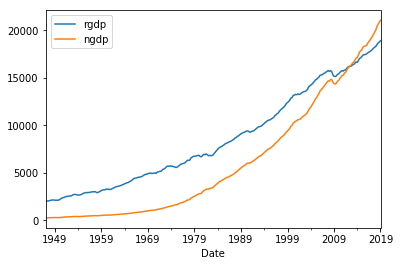

In [5]:
%matplotlib inline
gdp.plot.line()

In [6]:
gdp['Real_Change'] = gdp.rgdp - gdp.rgdp.shift(1)
gdp['Nominal_Change'] = gdp.ngdp - gdp.ngdp.shift(1)

In [7]:
#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [15, 10]

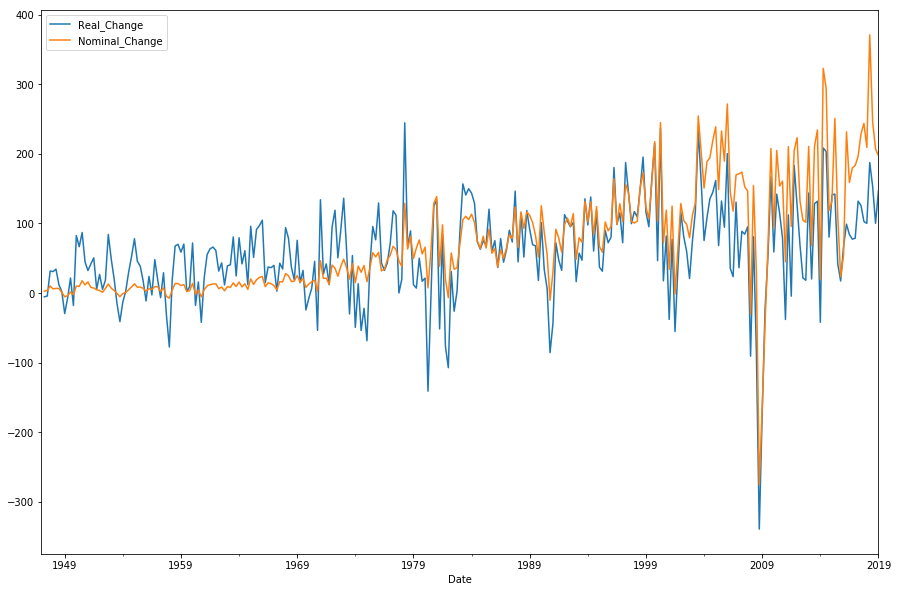

In [8]:
gdp[['Real_Change', 'Nominal_Change']].plot(figsize=(15,10))

### For more on Matplotlib see the offical documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

# Pandas Ex2

### Choose a traded stock. Look at the companies total revenue and gross profit for 2018


I'll choose Cat. Zacks/FC is a data service that provides extensive data on companies. This data is available in limited range from quamndl (acacemic license is $1,200 per year to full access). 

See [here](https://www.quandl.com/tools/python) for documentation on the Quandl Python module, and [here](https://docs.quandl.com/docs/python-tables) for documentation on quandly get_table.)

In [9]:
quandl.ApiConfig.api_key = "M6P9SeQJKpvPw3tyHJsk" # This is Dr. Smith's API Key (you can register for your own as well)

In [10]:
mydata = quandl.get_table('ZACKS/FC', ticker='CAT') # see here https://docs.quandl.com/docs/python-tables

In [11]:
list(mydata.columns.values)

['m_ticker',
 'ticker',
 'comp_name',
 'comp_name_2',
 'exchange',
 'currency_code',
 'per_end_date',
 'per_type',
 'per_code',
 'per_fisc_year',
 'per_fisc_qtr',
 'per_cal_year',
 'per_cal_qtr',
 'data_type_ind',
 'filing_type',
 'qtr_nbr',
 'zacks_sector_code',
 'zacks_x_ind_code',
 'zacks_metrics_ind_code',
 'fye_month',
 'comp_cik',
 'per_len',
 'sic_code',
 'filing_date',
 'last_changed_date',
 'state_incorp_name',
 'bus_address_line_1',
 'bus_city',
 'bus_state_name',
 'bus_post_code',
 'bus_phone_nbr',
 'bus_fax_nbr',
 'mail_address_line_1',
 'mail_city',
 'mail_state_name',
 'mail_post_code',
 'country_name',
 'country_code',
 'home_exchange_name',
 'emp_cnt',
 'emp_pt_cnt',
 'emp_ft_cnt',
 'emp_other_cnt',
 'comm_share_holder',
 'auditor',
 'auditor_opinion',
 'comp_url',
 'email_addr',
 'nbr_shares_out',
 'shares_out_date',
 'officer_name_1',
 'officer_title_1',
 'officer_name_2',
 'officer_title_2',
 'officer_name_3',
 'officer_title_3',
 'officer_name_4',
 'officer_title_4'

In [12]:
data = quandl.get_table('ZACKS/FC', paginate=True, ticker=['CAT'], 
                        qopts={'columns':['ticker', 'per_end_date', 'tot_revnu', 'gross_profit']})
data

,ticker,per_end_date,tot_revnu,gross_profit
None,,,,
0,CAT,2018-12-31,54722.0,17725.0
1,CAT,2018-03-31,12859.0,4293.0
2,CAT,2018-06-30,14011.0,4589.0
3,CAT,2018-09-30,13510.0,4488.0
4,CAT,2018-12-31,14342.0,4355.0


In [13]:
data['tot_revnu']


None
0    54722.0
1    12859.0
2    14011.0
3    13510.0
4    14342.0
Name: tot_revnu, dtype: float64

 # Pandas Ex3 - Highs and Lows of Apple
 
 Analye the performance of Apple Stock
 
 Find the max and min closing price.
 
 Find the max in min single (trading) day increase.
 

In [14]:
aapl = quandl.get("EOD/AAPL")
aapl.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,63.448220,64.413260,62.708355,62.866622,82982200.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,64.279441,64.624283,63.857397,64.167625,86258200.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,64.368225,64.423554,63.517703,63.727438,59091900.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,64.135329,64.256280,63.042902,64.107021,89881400.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,64.979418,65.355140,64.783836,65.129964,85171800.0


In [15]:
aapl.tail(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,170.199275,172.007098,170.130870,171.020124,20949896.0
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,170.697648,171.424686,170.521751,171.020124,16349444.0
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,166.906104,167.560829,165.810660,166.681347,33185536.0
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,166.222062,166.886560,165.840954,166.710663,21498213.0
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,167.101544,167.932166,166.593399,167.179720,16480187.0


Find AAPL's max and min daily close day-pver-day increase (from all data available from quandl)

In [16]:
aapl['Increase'] = aapl.Close - aapl.Close.shift(1)
aapl.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Increase
Date,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,63.448220,64.413260,62.708355,62.866622,82982200.0,NaN
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,64.279441,64.624283,63.857397,64.167625,86258200.0,10.111
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,64.368225,64.423554,63.517703,63.727438,59091900.0,-3.421
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,64.135329,64.256280,63.042902,64.107021,89881400.0,2.950
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,64.979418,65.355140,64.783836,65.129964,85171800.0,7.950


In [17]:
aapl.Increase.max()

43.01999999999998

In [18]:
aapl.loc[aapl['Increase'] == aapl.Increase.max()]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Increase
Date,,,,,,,,,,,,,
2014-04-24,568.21,570.0,560.73,567.77,27139700.0,0.0,1.0,73.978509,74.211559,73.004645,73.921222,189977900.0,43.02


In [19]:
aapl.Increase.min()

-551.87

In [20]:
aapl.loc[aapl['Increase'] == aapl.Increase.min()]


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Increase
Date,,,,,,,,,,,,,
2014-06-09,92.7,93.88,91.75,93.7,75414997.0,0.0,7.0,84.956717,86.038151,84.086071,85.873187,75414997.0,-551.87


### Find the max and min percentage increase

In [21]:
aapl['PercIncrease'] = (aapl.Close - aapl.Close.shift(1))/aapl.Close.shift(1)
aapl.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Increase,PercIncrease
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,63.448220,64.413260,62.708355,62.866622,82982200.0,NaN,NaN
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,64.279441,64.624283,63.857397,64.167625,86258200.0,10.111,0.020695
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,64.368225,64.423554,63.517703,63.727438,59091900.0,-3.421,-0.006860
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,64.135329,64.256280,63.042902,64.107021,89881400.0,2.950,0.005956
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,64.979418,65.355140,64.783836,65.129964,85171800.0,7.950,0.015957


In [22]:
aapl.PercIncrease.max()

0.0819818961410195

In [23]:
aapl.loc[aapl['PercIncrease'] == aapl.PercIncrease.max()]


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Increase,PercIncrease
Date,,,,,,,,,,,,,,
2014-04-24,568.21,570.0,560.73,567.77,27139700.0,0.0,1.0,73.978509,74.211559,73.004645,73.921222,189977900.0,43.02,0.081982


In [24]:
aapl.PercIncrease.min()

-0.8548569481233638

In [25]:
aapl.loc[aapl['PercIncrease'] == aapl.PercIncrease.min()]


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Increase,PercIncrease
Date,,,,,,,,,,,,,,
2014-06-09,92.7,93.88,91.75,93.7,75414997.0,0.0,7.0,84.956717,86.038151,84.086071,85.873187,75414997.0,-551.87,-0.854857


# Assignment07

For Assignment07, you will use pandas and the quandl python library (https://www.quandl.com/tools/python)

Pick any publically traded stock. Use the python quandl module (https://www.quandl.com/tools/python) to get a historical record of at least the ten years of stock price for the stock. With this data identify the single best day-over-day closing price increase.

To submit this assignment, you will create your own Jupyter Notebook within your ST?? repo. 
